In [5]:
from osim.env import L2RunEnv
import numpy as np
from osim.env import ProstheticsEnv
import torch
import matplotlib.pyplot as plt

In [6]:
half_muscle_names = [
    "hamstring",
    "biceps femoris",
    "gluteus maximus",
    "iliopsoas",
    "rectus femoris",
    "vastus",
    "gastrocnemius",
    "soleus",
    "tibialis anterior"
]
muscle_names = []
for mn in half_muscle_names:
    muscle_names.append(mn + "_right")
for mn in half_muscle_names:
    muscle_names.append(mn + "_left")

colors = ['C' + str(j) for j in range(10)]
# colors = ['c0']

In [2]:
observation = env.reset(project=True)

NameError: name 'env' is not defined

In [36]:
model_path = 'trained_models/ppo/skelefactor_walk_good_bio_positive_enforcement_7fact.pt'
data = torch.load(model_path)
weight = data[0].state_dict()['dist.fc_mean.weight'].numpy()
stds = data[0].state_dict()['dist.logstd._bias']

In [10]:
inputs = np.eye(5)*10
env = L2RunEnv(visualize=True)
for inp in inputs:
    inp = np.expand_dims(inp, 0)
    action = np.matmul(inp, np.transpose(weight))
#     action = action + bias
    env.reset()
    for j in range(5):
        env.step(action.flatten())
    input()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
g


KeyboardInterrupt: 

In [37]:
# sparse[np.abs(sparse) < 0.4] = 0
# sparse[sparse > 0] = 1
# sparse[sparse < 0] = -1
sparse.shape

(18, 7)

In [42]:
stds.numpy().shape

(18, 1)

<BarContainer object of 18 artists>

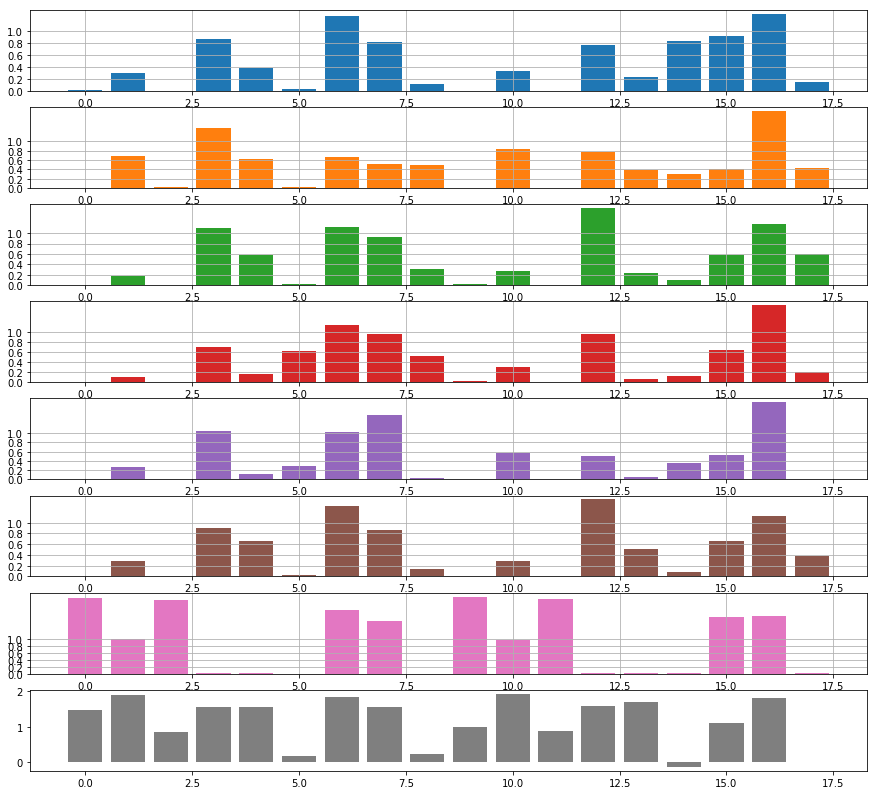

In [337]:
model_path = 'trained_models/ppo/skelefactor_walk_good_bio_positive_enforcement_fact7.pt'
data = torch.load(model_path)
weight = data[0].state_dict()['dist.fc_mean.weight'].numpy()
stds = data[0].state_dict()['dist.logstd._bias']
sparse = weight.copy()
fig, axs = plt.subplots(nrows = sparse.shape[1]+1, ncols=1, figsize=(15,sparse.shape[1]*2))
for i in range(sparse.shape[1]):
#     plt.figure()
    axs[i].bar(np.arange(0, 18), sparse[:,i], color='C' +str(i))
    axs[i].set_yticks(np.arange(0, 1.2, 0.2))
    axs[i].grid()
#     break
axs[-1].bar(np.arange(0, 18), stds[:,0], color='C' + str(i+1))

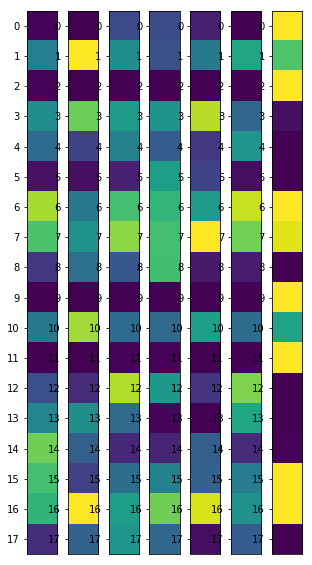

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(5,10))
for i in range(7):
    axs[i].imshow(sparse[:, i:i+1], vmin=0, vmax=1)
#     axs[i].grid(which='both')
    axs[i].set_yticks(range(0, 18))
    axs[i].set_xticks([])
# plt.imshow(sparse)
# plt.colorbar()

In [53]:
plt.ylabel()

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

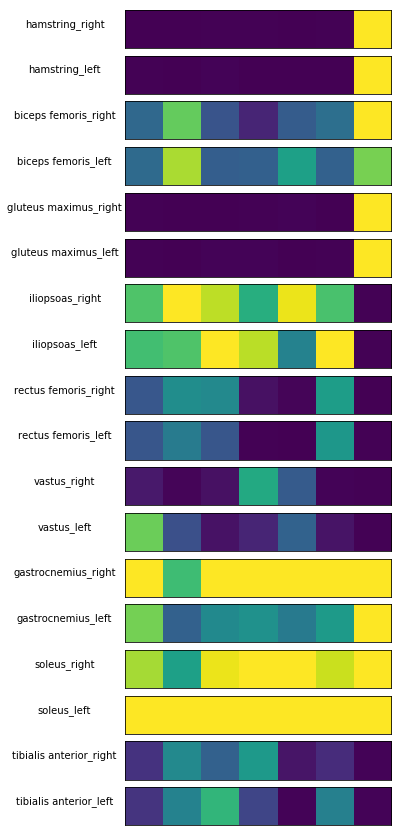

In [275]:
fig, axs = plt.subplots(nrows=18, ncols=1, figsize=(5,15))
order = range(0, 9)
new_order = []
for o in order:
    new_order.append(o)
    new_order.append(o + 9)
for i in range(len(new_order)):
    no = new_order[i]
    axs[i].imshow(sparse[no:no+1, :], vmin=0, vmax=1)
#     axs[i].grid(which='both')
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylabel(muscle_names[no], rotation=0, labelpad=60)
# plt.imshow(sparse)
# plt.colorbar()

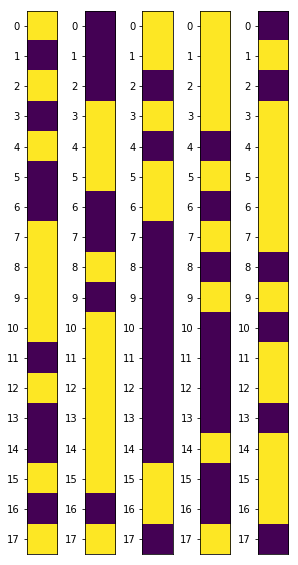

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(5,10))
for i in range(5):
    axs[i].imshow(sparse[:, i:i+1])
#     axs[i].grid(which='both')
    axs[i].set_yticks(range(0, 18))
    axs[i].set_xticks([])
# plt.imshow(sparse)
# plt.colorbar()

In [45]:
rando = np.random.normal(size=(3, 10000))

In [9]:
means = np.random.uniform(size=(3))
stds = np.random.uniform(low=0.5, high=1.0, size=(3))

array([[0.81051167, 0.81051167, 0.81051167, ..., 0.81051167, 0.81051167,
        0.81051167],
       [0.61928815, 0.61928815, 0.61928815, ..., 0.61928815, 0.61928815,
        0.61928815],
       [0.4125484 , 0.4125484 , 0.4125484 , ..., 0.4125484 , 0.4125484 ,
        0.4125484 ]])

In [16]:
linear_layer

array([[0.45932581, 0.20445536, 0.95618472],
       [0.35901118, 0.49222343, 0.10571187],
       [0.98629551, 0.0895999 , 0.29721557],
       [0.17883771, 0.43361445, 0.91591809],
       [0.30825233, 0.92203951, 0.32776456]])

In [12]:
lindos = []
for i in range(rando.shape[1]):
    lindos.append(np.matmul(linear_layer, rando[:,i]))
lindos = np.array(lindos)

(1000, 5)

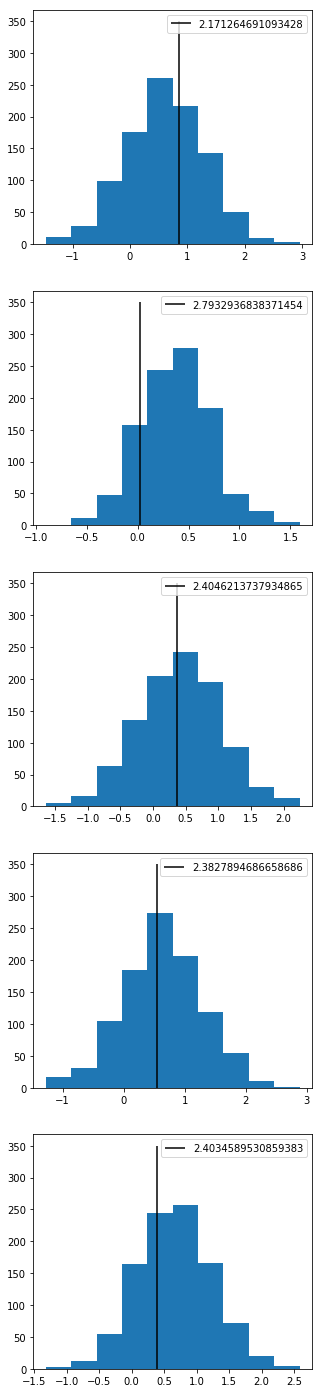

In [34]:
linear_layer = np.ones(shape=(5,3))
fig, axs = plt.subplots(nrows=lindos.shape[1], ncols=1, figsize=(5, 25))
for i in range(5):
    axs[i].hist(lindos[:,i])
    # lets estimate liklihood....
    pt = np.random.uniform()
    
    liklihood = lindos.shape[0]/np.sum(np.tanh(np.abs(lindos[:,i] - pt)))
    axs[i].vlines(pt, 0, 350, label=str(liklihood))
    axs[i].legend()
#     axs[i].scatter(0.8, 350, color='r')


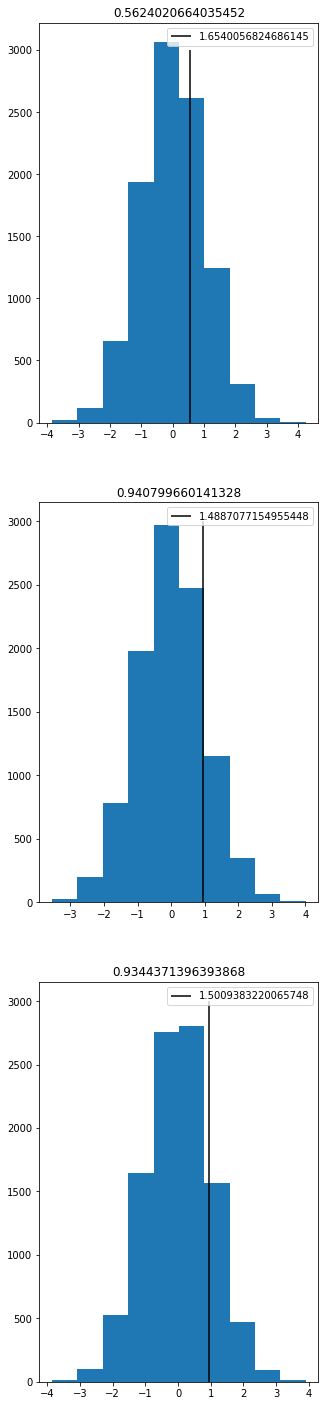

In [47]:
fig, axs = plt.subplots(nrows=rando.shape[0], ncols=1, figsize=(5, 25))
for i in range(3):
    axs[i].hist(rando[i,:])
    pt = np.random.uniform()
    liklihood = rando.shape[1]/np.sum(np.tanh(np.abs(rando[i,:] - pt)))
    axs[i].vlines(pt, 0, 3000, label=str(liklihood))
    axs[i].legend()
    axs[i].set_title(str(pt))


In [227]:
normy = torch.distributions.normal.Normal(mean,torch.ones(mean.shape))

In [230]:
normy.log_prob(mean)

tensor([-0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189,
        -0.9189, -0.9189, -0.9189, -0.9189])

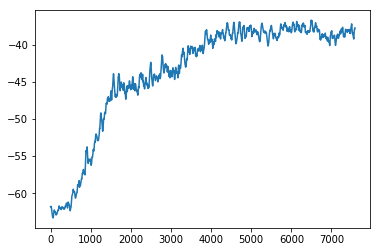

In [217]:
returns = np.load('returns/skelefactor_walk_good_bio_positive_enforcement_7fact.npy')
plt.plot(np.convolve(np.ones(50)/50, returns, mode='valid'))

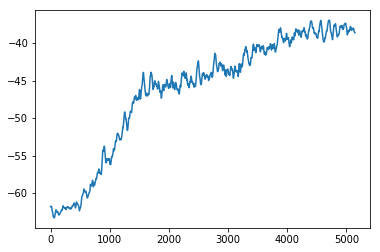

In [65]:
import gym

In [66]:
from gym.envs.classic_control import AcrobotEnv

In [213]:
e = AcrobotEnv()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [214]:
e.action_space

Discrete(3)

In [82]:
regular = [7, 50, 100, 150, 200, 250, 300]
regular_rewards = [-500, -173.3, -95, -102, -83.8, -92.2, -81.8]

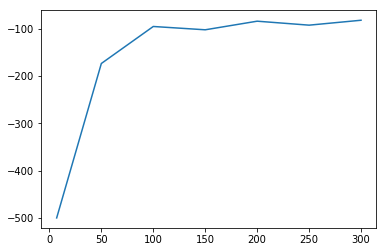

In [84]:
plt.figure()
plt.plot(regular, regular_rewards, label='reg')

In [237]:
mean = torch.ones((12)).float()
normy = torch.distributions.Normal(mean,mean)

In [116]:
mean.size() + mean.size()

torch.Size([12, 4, 12, 4])

In [105]:
mean.index_add_(0, (torch.ones(1)*11).long(), torch.ones(1))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.])

In [295]:
hack = torch.ones((200))
samples = normy.sample(hack.size())

TypeError: 'module' object is not callable

In [234]:
samples.shape

torch.Size([1000, 12])

In [322]:
linear = torch.randn((12, 24))*12

In [323]:
r = torch.matmul(samples, linear)

In [324]:
m = torch.matmul(mean, linear)

In [305]:
m.shape

torch.Size([24])

In [286]:
normy.log_prob(mean)

tensor([-0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189,
        -0.9189, -0.9189, -0.9189, -0.9189])

In [273]:
for i,m in enumerate(mean):
#     print(sampl)
#     print(1000/torch.sum(torch.tanh(torch.abs(samples[:,i] - m))))
    print(torch.log(samples.shape[0]/4.5/torch.sum((torch.abs(samples[:,i] - m -166)))))
    

tensor(-6.6163)
tensor(-6.6172)
tensor(-6.6159)
tensor(-6.6171)
tensor(-6.6165)
tensor(-6.6160)
tensor(-6.6160)
tensor(-6.6163)
tensor(-6.6161)
tensor(-6.6163)
tensor(-6.6159)
tensor(-6.6166)


In [278]:
# Building a Logistic Distribution
# X ~ Uniform(0, 1)
# f = a + b * logit(X)
# Y ~ f(X) ~ Logistic(a, b)
base_distribution = torch.distributions.Uniform(0, 1)
transforms = [torch.distributions.transforms.().inv, AffineTransform(loc=a, scale=b)]
logistic = TransformedDistribution(base_distribution, transforms)

AttributeError: module 'torch' has no attribute 'SigmoidTransform'

In [279]:
import scipy

In [292]:
mean.shape

torch.Size([12])

In [306]:
r.shape

torch.Size([2000, 24])

In [325]:
gkde = scipy.stats.gaussian_kde(r[:,0].numpy())

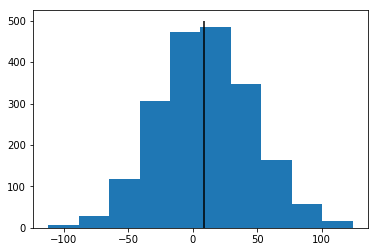

In [326]:
plt.figure()
plt.hist(r[:,0].flatten())
plt.vlines(m[0], 0, 500)

In [334]:
torch.from_numpy(gkde.logpdf(m[0]-6))

tensor([-4.5232], dtype=torch.float64)

In [320]:
m[0]

tensor(-3.7786)